# Abstract 
Analyze yenta data made from tweets and my friends shared. This file mainly focused on simple regression models.
Purpose of this note is to understand the relation btw total and each genders and research what fitting is proper. Though this a

In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-darkgrid')

In [55]:
df = pd.read_csv('../yenta.csv')
df = df.sort_values(by='cnt')
df.gender = df.gender.replace('male', 0)
df.gender = df.gender.replace('female', 1)
df.age = df.age.replace('None', np.nan)
df = df.dropna()
df.age = df.age.astype(int)
df.head()

,gender,age,job,is_staff,cnt,male,female,under_21,22_25,26_30,...,top_2,top_3,top_4,top_5,top_1_cnt,top_2_cnt,top_3_cnt,top_4_cnt,top_5_cnt,length
19,0,23,r&d,0,68,60,8,1,9,18,...,marketing,sales,strategist,director,31,22,22,19,18,3
11,1,27,recruiter,0,126,122,4,2,10,28,...,marketing,sales,strategist,pm,54,50,48,40,39,2
8,1,32,hr,0,154,137,17,0,14,33,...,marketing,hr,sales,strategist,68,58,51,48,47,9
12,0,35,ceo,0,213,191,22,4,32,53,...,sales,ceo,strategist,consultant,83,73,71,66,48,6
0,0,22,designer,1,266,239,27,9,62,69,...,sales,marketing,pm,strategist,104,94,87,77,73,11


Previously, I found the relationship beween total count and components like genders and generations. Then, I use regression model to total count and gender factors to understand how much each genders effect to total count.

To comprehend below codes, we should learn the least square method. This is the most basic regression tool to numeric data. Main concept is to minimize error.
More precise explanation can accessible for you on [statsmodels official documentation](https://www.statsmodels.org/stable/regression.html).

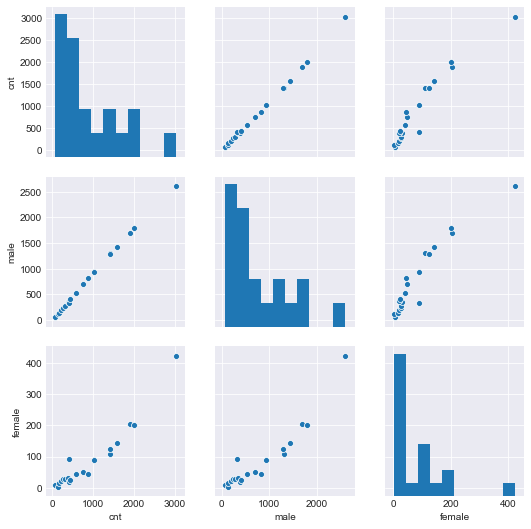

In [210]:
import statsmodels.api as sm

x = df[['male', 'female']]
y = df['cnt']

sns.pairplot(df[['cnt', 'male', 'female']])

Fit OLS model to this data.

In [194]:
model = sm.OLS(y, x.male)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           3.12e-30
Time:                        22:38:53   Log-Likelihood:                -99.772
No. Observations:                  20   AIC:                             201.5
Df Residuals:                      19   BIC:                             202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
male           1.1206      0.008    142.240      0.000       1.104       1.137
==============================================================================
Omnibus:                       21.262   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.317
Skew:                           1.933   Prob(JB):                     1.17e-06
Kurtosis:                       7.223   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

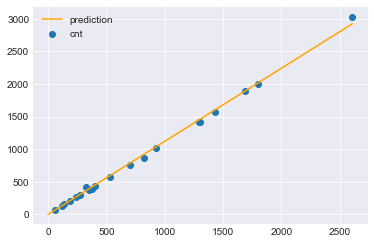

In [195]:
param = result.params['male']
x_plot = np.linspace(0, x.male.max(), 100)
plt.scatter(x.male, y)
plt.plot(x_plot, param * x_plot, c='orange', label='prediction')
plt.legend()
plt.savefig('ols_cnt2male')
plt.show()

In [197]:
sm.OLS(y, sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.527e+07
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           6.69e-58
Time:                        22:39:17   Log-Likelihood:                -6.4651
No. Observations:                  20   AIC:                             18.93
Df Residuals:                      17   BIC:                             21.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.133     -0.095      0.925      -0.293       0.268
male           1.0004      0.000   2843.650      0.000       1.000       1.001
female         0.9983      0.002    407.039      0.000       0.993       1.003
==============================================================================
Omnibus:                       12.251   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.950
Skew:                           1.583   Prob(JB):                      0.00691
Kurtosis:                       4.382   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
result = sm.OLS(y, x.female).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     297.2
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           4.65e-13
Time:                        22:39:38   Log-Likelihood:                -141.37
No. Observations:                  20   AIC:                             284.7
Df Residuals:                      19   BIC:                             285.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
female         8.6815      0.504     17.239      0.000       7.627       9.735
==============================================================================
Omnibus:                       11.868   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.609
Skew:                          -1.353   Prob(JB):                      0.00819
Kurtosis:                       5.052   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

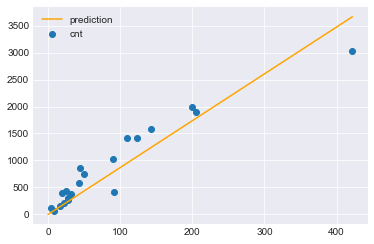

In [191]:
param = result.params['female']
x_plot = np.linspace(0, x.female.max(), 100)
plt.scatter(x.female, y)
plt.plot(x_plot, param * x_plot, c='orange', label='prediction')
plt.legend()
plt.savefig('ols_cnt2female')
plt.show()

In [200]:
model = sm.OLS(y, sm.add_constant(x.male))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9818.
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           4.27e-26
Time:                        22:39:53   Log-Likelihood:                -98.312
No. Observations:                  20   AIC:                             200.6
Df Residuals:                      18   BIC:                             202.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.9222     11.844     -1.682      0.110     -44.806       4.962
male           1.1351      0.011     99.086      0.000       1.111       1.159
==============================================================================
Omnibus:                        7.154   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                4.579
Skew:                           1.040   Prob(JB):                        0.101
Kurtosis:                       4.082   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

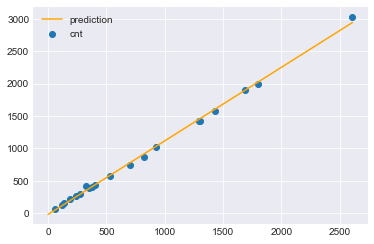

In [201]:
params = result.params
x_plot = np.linspace(0, x.male.max(), 100)
plt.scatter(x.male, y)
plt.plot(x_plot, params['const'] + params['male'] * x_plot, c='orange', label='prediction')
plt.legend()
plt.savefig('ols_cnt2male')
plt.show()

In [215]:
model = sm.OLS(y, sm.add_constant(x.female))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           6.99e-11
Time:                        23:38:29   Log-Likelihood:                -137.19
No. Observations:                  20   AIC:                             278.4
Df Residuals:                      18   BIC:                             280.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.6643     72.220      3.055      0.007      68.936     372.393
female         7.5588      0.558     13.548      0.000       6.387       8.731
==============================================================================
Omnibus:                        0.592   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.663
Skew:                          -0.253   Prob(JB):                        0.718
Kurtosis:                       2.266   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

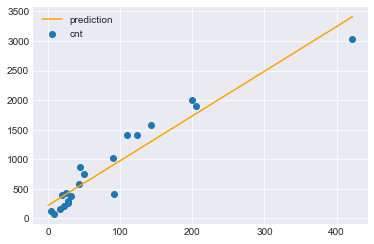

In [203]:
params = result.params
x_plot = np.linspace(0, x.female.max(), 100)
plt.scatter(x.female, y)
plt.plot(x_plot, params['const'] + params['female'] * x_plot, c='orange', label='prediction')
plt.legend()
plt.savefig('ols_cnt2female')
plt.show()

In [204]:
model = sm.OLS(x.female, x.male)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 female   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           4.08e-12
Time:                        22:40:03   Log-Likelihood:                -99.803
No. Observations:                  20   AIC:                             201.6
Df Residuals:                      19   BIC:                             202.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.1204      0.008     15.257      0.000       0.104       0.137
==============================================================================
Omnibus:                       21.527   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.969
Skew:                           1.951   Prob(JB):                     8.44e-07
Kurtosis:                       7.281   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

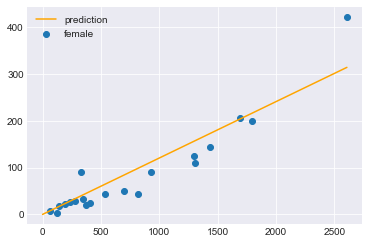

In [205]:
param = result.params['male']
x_plot = np.linspace(0, x.male.max(), 100)
plt.scatter(x.male, x.female)
plt.plot(x_plot,param * x_plot, c='orange', label='prediction')
plt.legend()
plt.show()

In [206]:
get_ols_result(df[['gender', 'age', 'is_staff']], df.cnt)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     12.11
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           0.000174
Time:                        22:40:06   Log-Likelihood:                -158.05
No. Observations:                  20   AIC:                             322.1
Df Residuals:                      17   BIC:                             325.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gender      -246.7662    331.556     -0.744      0.467    -946.288     452.755
age           27.2425      6.280      4.338      0.000      13.992      40.493
is_staff     697.5922    388.654      1.795      0.090    -122.397    1517.581
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.993
Skew:                           0.706   Prob(JB):                        0.369
Kurtosis:                       2.368   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By the way, simple linear regression seems to be bad because scatter plot looks non-linear relationship like quodratic. To make better model expression, I adapt the non-linear regression to grab the association.

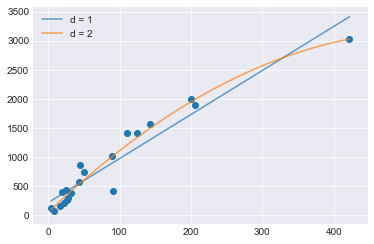

In [211]:
x_plot = np.linspace(x.female.min(), x.female.max(), 100)
plt.plot(x_plot, np.poly1d(np.polyfit(x.female, y, 1))(x_plot), label='d = 1', alpha=0.7)
plt.plot(x_plot, np.poly1d(np.polyfit(x.female, y, 2))(x_plot), label='d = 2', alpha=0.7)
plt.legend()
plt.scatter(x.female, y)
plt.savefig('fitting.png')

In [212]:
param = np.polyfit(x.female, y, 2)
x_pred = -param[1] / (2 * param[0])
print(f'x = {x_pred}')

x = 532.2547074863564


In [214]:
param[0] * x_pred**2 + param[1] * x_pred + param[2]

3161.014743645958